In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_parquet(r"C:\Users\fatih\Downloads\Call_Report_BankData_852218.parquet", engine='fastparquet')
df.head()

,Item,IDRSSD,Value,Date,CValue,schedule,schedule.label,Label1clean,Label2clean,Label3clean,...,line2,line3,line4,line5,line6,line7,column.label,type,balance,Status
0,RCFA3792,852218.0,1.644990e+11,2014-03-31,1.644990e+11,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main
1,RCFA3792,852218.0,1.683120e+11,2014-06-30,3.813000e+09,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main
2,RCFA3792,852218.0,1.705590e+11,2014-09-30,2.247000e+09,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main
3,RCFA3792,852218.0,1.733280e+11,2014-12-31,2.769000e+09,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main
4,RCFA3792,852218.0,1.781850e+11,2015-03-31,1.781850e+11,RCRI,Regulatory Capital Components and Ratios,47. Total capital,a. Total capital,None,...,1,None,None,None,None,None,,monetary,credit,Main


In [4]:
call_report_bankdata = df
df2 = call_report_bankdata.pivot_table(index='Date', columns=['schedule','labelStringclean'], values='CValue', aggfunc='sum')
df2.head()

schedule                             ENT                 \
labelStringclean FDIC certificate number Reporting date   
Date                                                      
2001-03-31                           NaN     20010331.0   
2001-06-30                           NaN          299.0   
2001-09-30                           NaN          300.0   
2001-12-31                           NaN          301.0   
2002-03-31                           NaN     20020331.0   

schedule                                             RC  \
labelStringclean Accumulated other comprehensive income   
Date                                                      
2001-03-31                                 -284000000.0   
2001-06-30                                 -388000000.0   
2001-09-30                                  921000000.0   
2001-12-31                                 -621000000.0   
2002-03-31                                 -877000000.0   

schedule                                             \
labelStringclean Available-for-sale debt securities   
Date                                                  
2001-03-31                             6.036100e+10   
2001-06-30                             5.420000e+08   
2001-09-30                            -2.316000e+09   
2001-12-31                            -5.671000e+09   
2002-03-31                             5.615900e+10   

schedule                                                                       \
labelStringclean Bank's fiscal year-end date (report the date in MMDD format)   
Date                                                                            
2001-03-31                                                      NaN             
2001-06-30                                                      NaN             
2001-09-30                                                      NaN             
2001-12-31                                                      NaN             
2002-03-31                                                      NaN             

schedule                        \
labelStringclean  Common stock   
Date                             
2001-03-31        1.211000e+09   
2001-06-30        0.000000e+00   
2001-09-30        0.000000e+00   
2001-12-31        2.650000e+08   
2002-03-31        1.785000e+09   

schedule                                                                  \
labelStringclean Direct and indirect investments in real estate ventures   
Date                                                                       
2001-03-31                                                      NaN        
2001-06-30                                                      NaN        
2001-09-30                                                      NaN        
2001-12-31                                                      NaN        
2002-03-31                                                      NaN        

schedule                                                                                       \
labelStringclean Equity securities with readily determinable fair values not held for trading   
Date                                                                                            
2001-03-31                                                      NaN                             
2001-06-30                                                      NaN                             
2001-09-30                                                      NaN                             
2001-12-31                                                      NaN                             
2002-03-31                                                      NaN                             

schedule                                                      \
labelStringclean Federal funds purchased in domestic offices   
Date                                                           
2001-03-31                                               NaN   
2001-06-30                                       

In [5]:
df2.shape

(89, 943)

In [6]:
df2.dtypes.value_counts()

float64    943
Name: count, dtype: int64

In [7]:
df2.isnull().sum().sort_values(ascending=False).head(15)

schedule  labelStringclean                                                                                                                                          
RCRI      Distributions and discretionary bonus payments during the quarter                                                                                             88
RCB       Unallocated portfolio layer fair value hedge basis adjustments                                                                                                88
RCRI      Eligible retained income                                                                                                                                      88
RCM       Estimated number of international remittance transfers for which your institution applied the permanent exchange rate exception                               87
          Estimated number of international remittance transfers for which your institution applied the permanent covered third-party fee exception    

In [8]:
is_null = pd.DataFrame(df2.isnull().sum(), columns = ['isnull']).sort_values(by="isnull", ascending=False)
is_null

isnull
schedule labelStringclean                                          
RCRI     Distributions and discretionary bonus payments ...      88
RCB      Unallocated portfolio layer fair value hedge ba...      88
RCRI     Eligible retained income                                88
RCM      Estimated number of international remittance tr...      87
         Estimated number of international remittance tr...      87
...                                                             ...
RCT      Total gross fiduciary and related services income        0
RCD      Securities issued by states and political subdi...       0
         Total trading assets                                     0
         Total trading liabilities                                0
RI       Commodity and other exposures                            0

[943 rows x 1 columns]

In [9]:
percentage_null = pd.DataFrame(df2.isnull().sum()/df2.shape[0]*100, columns = ['percentage_null']).sort_values(by= "percentage_null", ascending= False)
percentage_null
percentage_null.head(15)

percentage_null
schedule labelStringclean                                                   
RCRI     Distributions and discretionary bonus payments ...        98.876404
RCB      Unallocated portfolio layer fair value hedge ba...        98.876404
RCRI     Eligible retained income                                  98.876404
RCM      Estimated number of international remittance tr...        97.752809
         Estimated number of international remittance tr...        97.752809
RIE      Effect of adoption of Current Expected Credit L...        96.629213
         Initial allowances for credit losses recognized...        96.629213
         Effect of adoption of current expected credit l...        96.629213
RCRI     Leverage ratio                                            95.505618
RCCI     Other loans                                               95.505618
RCRI     Common equity tier 1 capital ratio                        95.505618
         Total capital ratio                                       95.505618
         Tier 1 capital ratio                                      95.505618
RCCII    "Loans to finance agricultural production and o...        94.382022
         "Loans secured by nonfarm nonresidential proper...        94.382022

In [10]:
summary_null = pd.concat([is_null, percentage_null], axis = 1).reset_index().rename({'index':'Columns'},axis = 1)
summary_null

,schedule,labelStringclean,isnull,percentage_null
0,RCRI,Distributions and discretionary bonus payments...,88,98.876404
1,RCB,Unallocated portfolio layer fair value hedge b...,88,98.876404
2,RCRI,Eligible retained income,88,98.876404
3,RCM,Estimated number of international remittance t...,87,97.752809
4,RCM,Estimated number of international remittance t...,87,97.752809
...,...,...,...,...
938,RCT,Total gross fiduciary and related services income,0,0.000000
939,RCD,Securities issued by states and political subd...,0,0.000000
940,RCD,Total trading assets,0,0.000000
941,RCD,Total trading liabilities,0,0.000000


In [11]:
def df_nans(df2, limit):
    missing = df2.isnull().sum()*100 / df2.shape[0]
    return missing.loc[lambda x : x >= limit]

def column_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()*100 / serial.shape[0]

In [12]:
df_nans(df2, 90)

schedule  labelStringclean                                                                                                                                                                                                                                          
RCB       Unallocated portfolio layer fair value hedge basis adjustments                                                                                                                                                                                                98.876404
RCCI      Other loans                                                                                                                                                                                                                                                   95.505618
RCCII     "Commercial and industrial loans" reported in Schedule RC-C, part I, item 4                                                                                                          

In [13]:
df_nans(df2, 90).index

MultiIndex([(  'RCB', ...),
            ( 'RCCI', ...),
            ('RCCII', ...),
            ('RCCII', ...),
            ('RCCII', ...),
            ('RCCII', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            ( 'RCEI', ...),
            (  'RCL', ...),
            (  'RCM', ...),
            (  'RCM', ...),
            (  'RCO', ...),
            ( 'RCRI', ...),
            ( 'RCRI', ...),
            ( 'RCRI', ...),
            ( 'RCRI', ...),
            ( 'RCRI', ...),
            ( 'RCRI', ...),
            (  'RIE', ...),
            (  'RIE', ...),
            (  'RIE', ...)],
           names=['schedule', 'labelStringclean'])

In [14]:
df_nans(df2, 80).values

array([83.14606742, 80.8988764 , 98.87640449, 85.39325843, 95.50561798,
       85.39325843, 89.88764045, 94.38202247, 94.38202247, 94.38202247,
       94.38202247, 92.13483146, 92.13483146, 92.13483146, 92.13483146,
       92.13483146, 92.13483146, 92.13483146, 92.13483146, 92.13483146,
       85.39325843, 94.38202247, 83.14606742, 82.02247191, 84.26966292,
       97.75280899, 97.75280899, 84.26966292, 89.88764045, 89.88764045,
       89.88764045, 89.88764045, 89.88764045, 89.88764045, 89.88764045,
       91.01123596, 80.8988764 , 80.8988764 , 80.8988764 , 95.50561798,
       98.87640449, 85.39325843, 85.39325843, 98.87640449, 85.39325843,
       85.39325843, 85.39325843, 85.39325843, 85.39325843, 95.50561798,
       80.8988764 , 95.50561798, 95.50561798, 85.39325843, 85.39325843,
       85.39325843, 84.26966292, 84.26966292, 84.26966292, 84.26966292,
       84.26966292, 84.26966292, 84.26966292, 84.26966292, 84.26966292,
       84.26966292, 84.26966292, 84.26966292, 84.26966292, 84.26

In [20]:
drop_columns = df_nans(df2, 80).index
drop_columns

MultiIndex([(   'RC', ...),
            (   'RC', ...),
            (  'RCB', ...),
            ( 'RCCI', ...),
            ( 'RCCI', ...),
            ( 'RCCI', ...),
            ( 'RCCI', ...),
            ('RCCII', ...),
            ('RCCII', ...),
            ('RCCII', ...),
            ...
            ('RICII', ...),
            ('RICII', ...),
            ('RICII', ...),
            ('RICII', ...),
            ('RICII', ...),
            ('RICII', ...),
            (  'RID', ...),
            (  'RIE', ...),
            (  'RIE', ...),
            (  'RIE', ...)],
           names=['schedule', 'labelStringclean'], length=103)

In [22]:
df2.drop(drop_columns, axis=1, inplace=True)

In [23]:
df2.shape

(89, 840)

In [24]:
df2.isnull().sum().sum()

19803

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2001-03-31 to 2023-03-31
Columns: 840 entries, ('ENT', 'FDIC certificate number') to ('RIE', 'Telecommunications expenses')
dtypes: float64(840)
memory usage: 584.8 KB


In [27]:
percentage_null = pd.DataFrame(df2.isnull().sum()/df2.shape[0]*100, columns = ['percentage_null']).sort_values(by= "percentage_null", ascending= False)
percentage_null
percentage_null.head(15)

percentage_null
schedule labelStringclean                                                   
RCEI     Total reciprocal deposits (as of the report date)         78.651685
RCS      Maximum amount of credit exposure arising from ...        77.528090
RCP      Repurchases and indemnifications of 1-4 family ...        77.528090
RCV      Total assets of asset-backed commercial paper (...        77.528090
         Securities not held for trading                           77.528090
RCB      Structured financial products                             77.528090
RCV      Other borrowed money                                      77.528090
RCB      U.S Government agency and sponsored agency obli...        77.528090
RCV      Other assets                                              77.528090
         Loans and leases held for investment, net of al...        77.528090
RCF      Interest-only strips receivable (not in the for...        77.528090
RCD      Structured financial products                             77.528090
RCP      Noninterest income for the quarter from the sal...        77.528090
         Retail originations during the quarter of 1-4 f...        77.528090
         Wholesale originations and purchases during the...        77.528090

In [28]:
df2.head()

schedule                             ENT                 \
labelStringclean FDIC certificate number Reporting date   
Date                                                      
2001-03-31                           NaN     20010331.0   
2001-06-30                           NaN          299.0   
2001-09-30                           NaN          300.0   
2001-12-31                           NaN          301.0   
2002-03-31                           NaN     20020331.0   

schedule                                             RC  \
labelStringclean Accumulated other comprehensive income   
Date                                                      
2001-03-31                                 -284000000.0   
2001-06-30                                 -388000000.0   
2001-09-30                                  921000000.0   
2001-12-31                                 -621000000.0   
2002-03-31                                 -877000000.0   

schedule                                                           \
labelStringclean Available-for-sale debt securities  Common stock   
Date                                                                
2001-03-31                             6.036100e+10  1.211000e+09   
2001-06-30                             5.420000e+08  0.000000e+00   
2001-09-30                            -2.316000e+09  0.000000e+00   
2001-12-31                            -5.671000e+09  2.650000e+08   
2002-03-31                             5.615900e+10  1.785000e+09   

schedule                                                                  \
labelStringclean Direct and indirect investments in real estate ventures   
Date                                                                       
2001-03-31                                                      NaN        
2001-06-30                                                      NaN        
2001-09-30                                                      NaN        
2001-12-31                                                      NaN        
2002-03-31                                                      NaN        

schedule                                                                                       \
labelStringclean Equity securities with readily determinable fair values not held for trading   
Date                                                                                            
2001-03-31                                                      NaN                             
2001-06-30                                                      NaN                             
2001-09-30                                                      NaN                             
2001-12-31                                                      NaN                             
2002-03-31                                                      NaN                             

schedule                                                      \
labelStringclean Federal funds purchased in domestic offices   
Date                                                           
2001-03-31                                               NaN   
2001-06-30                                               NaN   
2001-09-30                                               NaN   
2001-12-31                                               NaN   
2002-03-31                                      1.298300e+10   

schedule                                                                     \
labelStringclean Federal funds sold in domestic offices In domestic offices   
Date                                                                          
2001-03-31                                          NaN        1.312140e+11   
2001-06-30                                          NaN        6.651000e+09   
2001-09-30                                          NaN        8.873000e+09   
2001-12-31                                          NaN        1.336400e+10   
2002-03-31                                 1.9010

In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2001-03-31 to 2023-03-31
Columns: 840 entries, ('ENT', 'FDIC certificate number') to ('RIE', 'Telecommunications expenses')
dtypes: float64(840)
memory usage: 584.8 KB


In [30]:
print(df2.columns)

MultiIndex([('ENT', ...),
            ('ENT', ...),
            ( 'RC', ...),
            ( 'RC', ...),
            ( 'RC', ...),
            ( 'RC', ...),
            ( 'RC', ...),
            ( 'RC', ...),
            ( 'RC', ...),
            ( 'RC', ...),
            ...
            ('RIE', ...),
            ('RIE', ...),
            ('RIE', ...),
            ('RIE', ...),
            ('RIE', ...),
            ('RIE', ...),
            ('RIE', ...),
            ('RIE', ...),
            ('RIE', ...),
            ('RIE', ...)],
           names=['schedule', 'labelStringclean'], length=840)


In [31]:
df2["RIE"].head()

labelStringclean,Accounting and auditing expenses,Advertising and marketing expenses,Amount of component,Applicable income tax effect,Automated teller machine (ATM) and interchange expenses,Bank card and credit card interchange fees,Consulting and advisory expenses,Data processing expenses,Directors' fees,Earnings on/increase in value of cash surrender value of life insurance,...,Income and fees from the printing and sale of checks,Income and fees from wire transfers,"Insurance expenses (not included in employee expenses, premises and fixed asset expenses, and other real estate owned expenses)",Legal fees and expenses,Other real estate owned expenses,Postage,"Printing, stationery, and supplies",Rent and other income from other real estate owned,Safe deposit box rent,Telecommunications expenses
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-09-30,NaN,0.0,1.436000e+09,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN
2001-12-31,NaN,0.0,1.581000e+09,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,NaN
2002-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [133]:
df2["RI"].head()

labelStringclean,All other loans in domestic offices,All other loans secured by real estate,All other securities (includes securities issued by states and political subdivisions in the U.S),All other service charges on deposit accounts,Amortization expense and impairment losses for other intangible assets,Applicable income taxes (on item 8.c),CVA hedge,Change in net unrealized holding gains (losses) on equity securities not held for trading,Commercial and industrial loans,Commodity and other exposures,"Consumer account periodic maintenance charges levied on those transaction account and nontransaction savings account deposit products intended primarily for individuals for personal, household, or family use","Consumer customer automated teller machine (ATM) fees levied on those transaction account and nontransaction savings account deposit products intended primarily for individuals for personal, household, or family use","Consumer overdraft-related service charges levied on those transaction account and nontransaction savings account deposit products intended primarily for individuals for personal, household, or family use",Credit cards,Credit exposures,Credit losses on derivatives (see instructions),DVA hedge,"Discontinued operations, net of applicable income taxes",Equity security and index exposures,Estimated net gains (losses) on liabilities attributable to changes in instrument-specific credit risk,Estimated net gains (losses) on loans attributable to changes in instrument-specific credit risk,Expense of federal funds purchased and securities sold under agreements to repurchase,Expenses of premises and fixed assets (net of rental income) (excluding salaries and employee benefits and mortgage interest),Fees and commissions from annuity sales,Fees and commissions from securities brokerage,Foreign exchange exposures,Goodwill impairment losses,Gross credit valuation adjustment (CVA),Gross debit valuation adjustment (DVA),"Gross trading revenue, before including positive or negative net CVA and net DVA","If the reporting institution has applied pushdown accounting this calendar year, report the date of the institution's acquisition (see instructions)","In foreign offices, Edge and Agreement subsidiaries, and IBFs",Income (loss) before applicable income taxes and discontinued operations,"Income (loss) before change in net unrealized holding gains (losses) on equity securities not held for trading, applicable income taxes, and discontinued operations",Income (loss) before discontinued operations,Income from fiduciary activities,Income from lease financing receivables,Income from other insurance activities,Income from the sale and servicing of mutual funds and annuities in domestic offices,Income on tax-exempt loans and leases to states and political subdivisions in the U.S,Income on tax-exempt securities issued by states and political subdivisions in the U.S,"Interest expense incurred to carry tax-exempt securities, loans, and leases acquired after August 7, 1986, that is not deductible for federal income tax purposes",Interest income from trading assets,Interest income on balances due from depository institutions,Interest income on federal funds sold and securities purchased under agreements to resell,"Interest on deposits in foreign offices, Edge and Agreement subsidiaries, and IBFs",Interest on subordinated notes and debentures,Interest on trading liabilities and other borrowed money,Interest rate exposures,"Investment banking, advisory, and underwriting fees and commissions","LESS: Net income (loss) attributable to noncontrolling (minority) interests (if net income, report as a positive value; if net loss, report as a negative value)",Loans secured by 1-4 family residential properties,Loans to finance agricultural production and other loans to farmers,Loans to foreign governments and official institutions,Mortgage-backed securities,Net gains (losses) on assets,Net gains (losses) on credit derivatives held for purposes other 

In [32]:
df3 = df2["RI"]
df3.head()

labelStringclean,All other loans in domestic offices,All other loans secured by real estate,All other securities (includes securities issued by states and political subdivisions in the U.S),All other service charges on deposit accounts,Amortization expense and impairment losses for other intangible assets,Applicable income taxes (on item 8.c),CVA hedge,Change in net unrealized holding gains (losses) on equity securities not held for trading,Commercial and industrial loans,Commodity and other exposures,...,Total interest and fee income on loans,Total interest expense,Total interest income,Total noninterest expense,Total noninterest income,Trading revenue,"Transaction accounts (interest-bearing demand deposits, NOW accounts, ATS accounts, and telephone and preauthorized transfer accounts)",U.S Treasury securities and U.S Government agency obligations (excluding mortgage-backed securities),Underwriting income from insurance and reinsurance activities,Venture capital revenue
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-31,85000000.0,NaN,97000000.0,NaN,NaN,338000000.0,NaN,NaN,937000000.0,78000000.0,...,3.041000e+09,3.249000e+09,5.260000e+09,3.288000e+09,2.621000e+09,7.090000e+08,7000000.0,195000000.0,NaN,188000000.0
2001-06-30,68000000.0,NaN,135000000.0,NaN,NaN,310000000.0,NaN,NaN,914000000.0,99000000.0,...,2.708000e+09,2.795000e+09,4.860000e+09,2.996000e+09,1.803000e+09,5.030000e+08,6000000.0,173000000.0,NaN,-88000000.0
2001-09-30,77000000.0,NaN,150000000.0,NaN,NaN,259000000.0,NaN,NaN,791000000.0,18000000.0,...,2.429000e+09,2.532000e+09,4.450000e+09,2.922000e+09,2.148000e+09,7.840000e+08,6000000.0,160000000.0,NaN,-67000000.0
2001-12-31,430000000.0,NaN,191000000.0,NaN,NaN,158000000.0,NaN,NaN,856000000.0,-123000000.0,...,3.361000e+09,6.002000e+09,9.318000e+09,6.997000e+09,4.872000e+09,2.322000e+09,24000000.0,167000000.0,NaN,-152000000.0
2002-03-31,99000000.0,NaN,140000000.0,NaN,4000000.0,494000000.0,NaN,NaN,383000000.0,-23000000.0,...,2.295000e+09,2.393000e+09,4.638000e+09,4.014000e+09,2.952000e+09,1.170000e+09,7000000.0,152000000.0,NaN,-135000000.0


In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 89 entries, 2001-03-31 to 2023-03-31
Data columns (total 91 columns):
 #   Column                                                                                                                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                   --------------  -----  
 0   All other loans in domestic offices                                                                                                                                                                                      89 non-null     float64
 1   All other loans secured by real estate                                                                                                

In [34]:
df3.shape

(89, 91)

In [35]:
df3 = df3.rename(columns={"Net interest income" : "Net_Interest_Income"})


In [36]:
df3["Net_Interest_Income"]

Date
2001-03-31    2.011000e+09
2001-06-30    2.065000e+09
2001-09-30    1.918000e+09
2001-12-31    3.316000e+09
2002-03-31    2.245000e+09
                  ...     
2022-03-31    1.381800e+10
2022-06-30    1.533700e+10
2022-09-30    1.835500e+10
2022-12-31    2.128800e+10
2023-03-31    2.182000e+10
Name: Net_Interest_Income, Length: 89, dtype: float64

In [37]:
df3["Net_Interest_Income"].skew()

0.518604746555426

In [38]:
df3.isnull().sum()

labelStringclean
All other loans in domestic offices                                                                                                        0
All other loans secured by real estate                                                                                                    28
All other securities (includes securities issued by states and political subdivisions in the U.S)                                          0
All other service charges on deposit accounts                                                                                             56
Amortization expense and impairment losses for other intangible assets                                                                     4
                                                                                                                                          ..
Trading revenue                                                                                                                          

In [39]:
percentage_null = pd.DataFrame(df3.isnull().sum()/df3.shape[0]*100, columns = ['percentage_null']).sort_values(by= "percentage_null", ascending= False)
percentage_null
percentage_null.head(15)

,percentage_null
labelStringclean,
"Income (loss) before change in net unrealized holding gains (losses) on equity securities not held for trading, applicable income taxes, and discontinued operations",76.404494
Change in net unrealized holding gains (losses) on equity securities not held for trading,76.404494
"Gross trading revenue, before including positive or negative net CVA and net DVA",71.910112
DVA hedge,71.910112
Gross debit valuation adjustment (DVA),71.910112
Gross credit valuation adjustment (CVA),71.910112
CVA hedge,71.910112
"Time deposits of $250,000 or less",71.910112
"Time deposits of more than $250,000",71.910112


In [40]:
df3 = df3.fillna(df3.median())


In [41]:
df3.isnull().sum().sum()

0

In [42]:
df3.head()

labelStringclean,All other loans in domestic offices,All other loans secured by real estate,All other securities (includes securities issued by states and political subdivisions in the U.S),All other service charges on deposit accounts,Amortization expense and impairment losses for other intangible assets,Applicable income taxes (on item 8.c),CVA hedge,Change in net unrealized holding gains (losses) on equity securities not held for trading,Commercial and industrial loans,Commodity and other exposures,...,Total interest and fee income on loans,Total interest expense,Total interest income,Total noninterest expense,Total noninterest income,Trading revenue,"Transaction accounts (interest-bearing demand deposits, NOW accounts, ATS accounts, and telephone and preauthorized transfer accounts)",U.S Treasury securities and U.S Government agency obligations (excluding mortgage-backed securities),Underwriting income from insurance and reinsurance activities,Venture capital revenue
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-31,85000000.0,888000000.0,97000000.0,518000000.0,23000000.0,338000000.0,-78000000.0,1000000.0,937000000.0,78000000.0,...,3.041000e+09,3.249000e+09,5.260000e+09,3.288000e+09,2.621000e+09,7.090000e+08,7000000.0,195000000.0,4000000.0,188000000.0
2001-06-30,68000000.0,888000000.0,135000000.0,518000000.0,23000000.0,310000000.0,-78000000.0,1000000.0,914000000.0,99000000.0,...,2.708000e+09,2.795000e+09,4.860000e+09,2.996000e+09,1.803000e+09,5.030000e+08,6000000.0,173000000.0,4000000.0,-88000000.0
2001-09-30,77000000.0,888000000.0,150000000.0,518000000.0,23000000.0,259000000.0,-78000000.0,1000000.0,791000000.0,18000000.0,...,2.429000e+09,2.532000e+09,4.450000e+09,2.922000e+09,2.148000e+09,7.840000e+08,6000000.0,160000000.0,4000000.0,-67000000.0
2001-12-31,430000000.0,888000000.0,191000000.0,518000000.0,23000000.0,158000000.0,-78000000.0,1000000.0,856000000.0,-123000000.0,...,3.361000e+09,6.002000e+09,9.318000e+09,6.997000e+09,4.872000e+09,2.322000e+09,24000000.0,167000000.0,4000000.0,-152000000.0
2002-03-31,99000000.0,888000000.0,140000000.0,518000000.0,4000000.0,494000000.0,-78000000.0,1000000.0,383000000.0,-23000000.0,...,2.295000e+09,2.393000e+09,4.638000e+09,4.014000e+09,2.952000e+09,1.170000e+09,7000000.0,152000000.0,4000000.0,-135000000.0


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


In [44]:
X = df3.drop("Net_Interest_Income", axis=1)  
y = df3["Net_Interest_Income"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  


In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_model = RandomForestRegressor(n_estimators=200,max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.1474090824444445e+17


In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", -grid_search.best_score_)


Best parameters:  {'max_depth': None, 'n_estimators': 200}
Best score:  1.167829228977214e+18


In [80]:
from sklearn.model_selection import cross_val_score

# 5-fold cross validation
scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print("Mean Squared Error scores: ", -scores)
print("Mean Mean Squared Error: ", -scores.mean())


Mean Squared Error scores:  [4.27391682e+17 7.86339968e+17 3.29436587e+18 7.74104277e+17
 5.56944345e+17]
Mean Mean Squared Error:  1.167829228977214e+18


In [81]:
# En iyi parametrelerle bir model oluşturma
best_params = grid_search.best_params_
model = RandomForestRegressor(n_estimators=best_params["n_estimators"], max_depth=best_params["max_depth"], random_state=42)

# Modeli eğitme
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [82]:
# Test setinde tahminlerde bulunma
y_pred = model.predict(X_test)

# Mean Squared Error (MSE) hesaplama
mse = mean_squared_error(y_test, y_pred)
print("Test MSE: ", mse)


Test MSE:  1.1474090824444445e+17


R^2:  0.9917623202083142


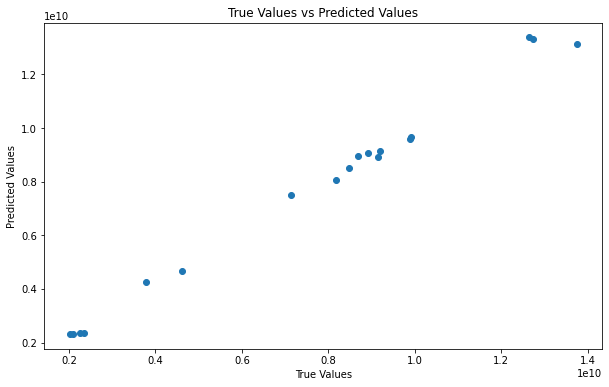

In [83]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# R^2 skorunu hesaplama
r2 = r2_score(y_test, y_pred)
print("R^2: ", r2)

# Gerçek değerlere karşı tahminleri çizme
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs Predicted Values")
plt.show()


In [84]:
importances = model.feature_importances_

feature_importances = pd.Series(importances, index=X.columns)

sorted_feature_importances = feature_importances.sort_values(ascending=False)

print(sorted_feature_importances)


labelStringclean
Income from lease financing receivables                                                                                                                 0.116438
Total interest and fee income on loans                                                                                                                  0.103821
Service charges on deposit accounts in domestic offices                                                                                                 0.102500
Other noninterest income                                                                                                                                0.096057
All other loans secured by real estate                                                                                                                  0.088117
                                                                                                                                                          ...   
Realized gains (l

In [88]:
sorted_feature_importances.sort_values(ascending=False).head(15)

labelStringclean
Income from lease financing receivables                                                                 0.116438
Total interest and fee income on loans                                                                  0.103821
Service charges on deposit accounts in domestic offices                                                 0.102500
Other noninterest income                                                                                0.096057
All other loans secured by real estate                                                                  0.088117
Credit cards                                                                                            0.078501
Total noninterest expense                                                                               0.047040
Income from the sale and servicing of mutual funds and annuities in domestic offices                    0.046088
U.S Treasury securities and U.S Government agency obligations (excluding mortga